In [1]:
import pandas as pd
import pickle
import seaborn as sns

sns.set_style("darkgrid")

In [2]:
with open("param_results.p", "rb") as f:
    data = pickle.load(f)
df = pd.DataFrame.from_dict(data, orient='columns')

In [3]:
attrs = ['conv_layers', 'conv_per_layer', 'dense_size', 'dropout1', 'dropout2', 'conv_kernel_shape']
def extract_config(df: pd.DataFrame):
    r = pd.Series((getattr(df.config, k) for k in attrs))
    return r
df[attrs] = df.apply(extract_config, axis=1)

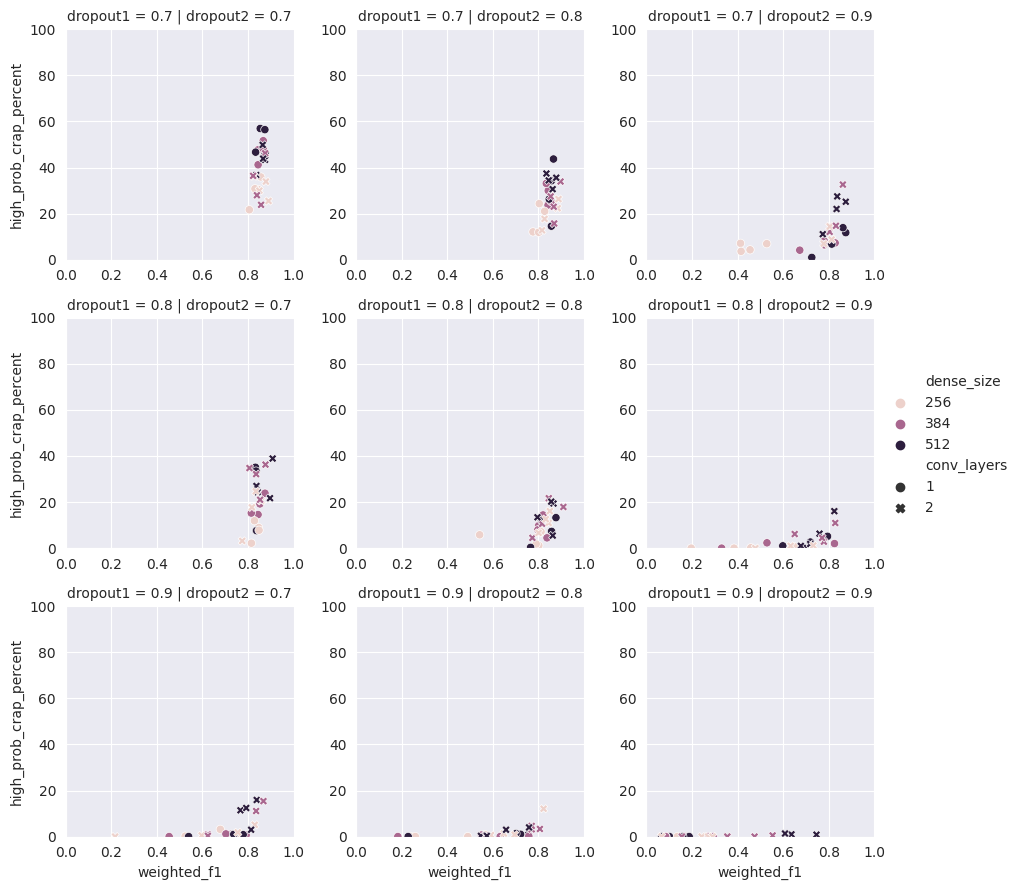

In [8]:
g = sns.FacetGrid(df, row='dropout1', col='dropout2', sharex=False, sharey=False, xlim=(0, 1), ylim=(0,100))
g.map_dataframe(sns.scatterplot, 'weighted_f1', 'high_prob_crap_percent', 'dense_size', style='conv_layers').add_legend()

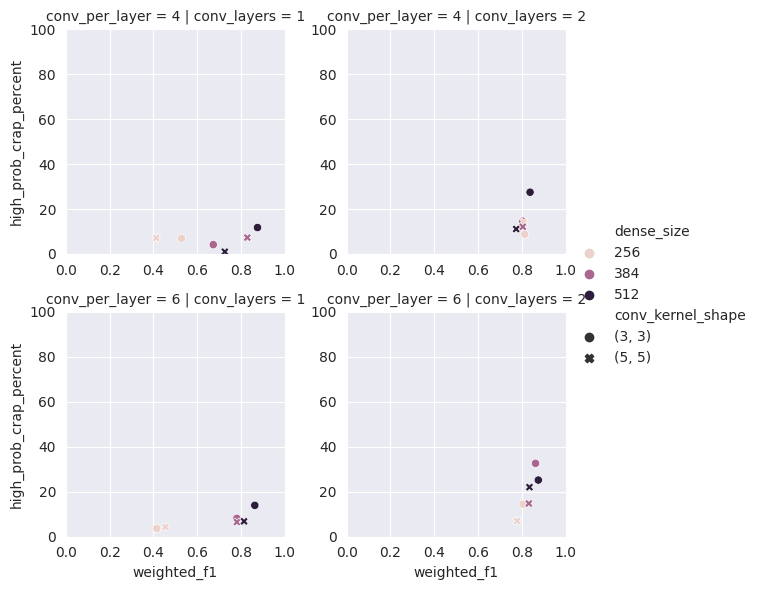

In [7]:
g = sns.FacetGrid(df[(df.dropout1==.7) & (df.dropout2==.9)], row='conv_per_layer', col='conv_layers', sharex=False, sharey=False, xlim=(0, 1), ylim=(0,100))
g.map_dataframe(sns.scatterplot, 'weighted_f1', 'high_prob_crap_percent', 'dense_size', style='conv_kernel_shape').add_legend()

In [9]:
df[(df.dropout1==.7) & (df.dropout2==.9) & (df.conv_layers==1) & (df.conv_per_layer==6) & (df.dense_size==512) & (df.conv_kernel_shape == (3,3))].config.values[0]

NetConfig(conv_layers=1, conv_per_layer=6, conv_kernel_shape=(3, 3), dropout1=0.7, dropout2=0.9, dense_size=512)